# MNIST 손글씨 -CNN v1
- 2 x conv2d layers
- 1 MaxPooling 2D layer
- 1 FCN layers
- 1 output layers

- 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape,X_test.shape,y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
#X_train, X_test 정규화 (0~1)
#이미지 차원 변경:CNN=2차원을 3차원으로 올려야.

X_train = X_train.reshape(-1,28,28,1) / 255.
X_test = X_test.reshape(-1,28,28,1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
#원핫인코딩
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test=to_categorical(y_test)
Y_train.shape,Y_test.shape


((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D,Flatten, MaxPooling2D
#flatten - 3차원인 conv2D를 1차원인 dense, fully connected layer로 
#넣어야 하기 때문에 차원 축소를 할 때 필요.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
model =Sequential([
                   Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1),activation='relu'),
                   Conv2D(64, (3,3), activation='relu'),
                   MaxPooling2D(), #= MaxPooling2D(pool_size=(2,2))
                   Flatten(), #24,24,64에서 1차원 512개의 노드로.
                   Dense(512,activation='relu'),
                   Dense(10,activation='softmax')
])
model.summary()

#18496=32 x 3 x 3 x 64 + 64

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4719104   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

In [8]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [10]:
model_path = 'best-mnist-cnn-v2.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

In [11]:
hist=model.fit(X_train,Y_train,validation_split=0.2,
                 epochs=100,batch_size=200,verbose=0,
                 callbacks=[mc,es])


Epoch 1: val_loss improved from inf to 0.06172, saving model to best-mnist-cnn-v2.h5

Epoch 2: val_loss improved from 0.06172 to 0.05402, saving model to best-mnist-cnn-v2.h5

Epoch 3: val_loss improved from 0.05402 to 0.04241, saving model to best-mnist-cnn-v2.h5

Epoch 4: val_loss improved from 0.04241 to 0.04107, saving model to best-mnist-cnn-v2.h5

Epoch 5: val_loss did not improve from 0.04107

Epoch 6: val_loss improved from 0.04107 to 0.04067, saving model to best-mnist-cnn-v2.h5

Epoch 7: val_loss did not improve from 0.04067

Epoch 8: val_loss did not improve from 0.04067

Epoch 9: val_loss did not improve from 0.04067

Epoch 10: val_loss did not improve from 0.04067

Epoch 11: val_loss did not improve from 0.04067

Epoch 12: val_loss did not improve from 0.04067

Epoch 13: val_loss did not improve from 0.04067

Epoch 14: val_loss did not improve from 0.04067

Epoch 15: val_loss did not improve from 0.04067

Epoch 16: val_loss did not improve from 0.04067


In [12]:
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)

313/313 [==============================] - 48s 153ms/step - loss: 0.0319 - accuracy: 0.9904


[0.03193129226565361, 0.9904000163078308]

Text(0.5, 0, 'Epoch')

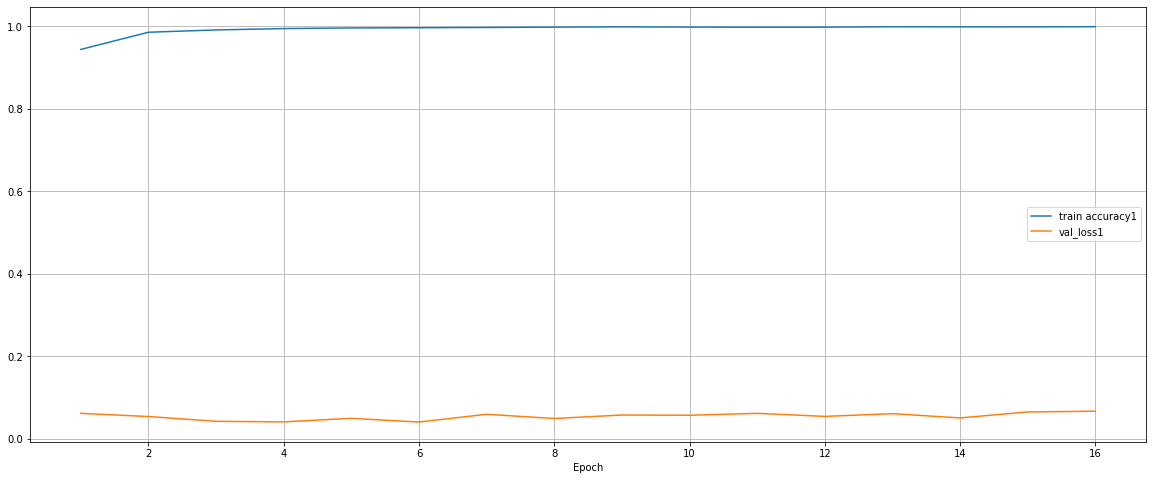

In [13]:
y_acc=hist.history['accuracy']
y_vloss=hist.history['val_loss']
xs=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs,y_acc,label='train accuracy1')
plt.plot(xs,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')